# 　　　　`Convolutional Neural Network` for Deep Learning
# 　　　　　　　　on Handwritten Digits `Classification` Task

## Task Overview 
<img src="https://user-images.githubusercontent.com/68801296/88917938-4008f180-d286-11ea-8667-50027700e3ea.png" width="500">
　　　　　　　　　　　　　　　　　　　　　　　　　　　　<strong>A Task Schema Diagram</strong>
                                              

## Setup Development Environment

In [3]:
## Import related Modules for TensorFlow framework and Keras API

import numpy as np
import tensorflow as tf
import keras

from tensorflow.keras import layers, optimizers

## Prepare Dataset 

### The Image Dataset of MNIST Handwritten Digits - Introduction 

### Load Dataset

Load the MNIST dataset distributed with Keras.
  

In [4]:
## Load the MNIST dataset 
mnist_dataset = keras.datasets.mnist

## Split MNIST dataset to get the images and labels for both train and test sets 
(images_train, labels_train),(images_test, labels_test) = mnist_dataset.load_data()

###  Explore Dataset

##### Find out dimensions of the dataset


In [5]:
images_train_dimension = images_train.shape
print("Dimension of train dataset: \n", images_train_dimension)

images_test_dimension = images_test.shape
print("Dimension of test dataset: \n", images_test_dimension)

Dimension of train dataset: 
 (60000, 28, 28)
Dimension of test dataset: 
 (10000, 28, 28)


In [6]:
print("Number of train images: \n", images_train_dimension[0])

print("Dimension of an image: \n", images_train_dimension[1:3])

Number of train images: 
 60000
Dimension of an image: 
 (28, 28)


##### Find out the range of pixel values in image

In [4]:
##-Q5: What is the value range of all image pixels in the dataset?
print( "The range of pixel values of the images is: ", [np.min(images_train), np.max(images_train)] )  
 

The range of pixel values of the images is:  [0, 255]


##### Find out the value of labels and their frequencies  

In [22]:
##-Q6: How many value of labels for the images in the dataset?
(labels, counts) = np.unique(labels_train, return_counts=True)
print( "The unique values of the labels in the dataset are: \n", labels )
print('\n')
print( "The count of each label in the dataset are: \n", counts )

The unique values of the labels in the dataset are: 
 [0 1 2 3 4 5 6 7 8 9]


The count of each label in the dataset are: 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


##### Display a sample image 
get an idea of the kind of images your CNN is going to work with

The image of the 6th in train dataset is displayed below: 

The label for the second training image is: 
 2


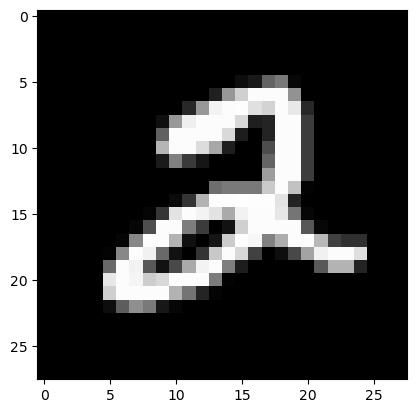

In [41]:
## Display the 6th image from the train dataset 

idx_img = 5

print("The image of the 6th in train dataset is displayed below: \n")

## If encounter error message that says package matplotlib is not found, then install it by running code:  
##    pip install matplotlib   

# pip install matplotlib   
import matplotlib.pyplot as plt

plt.gray()   ## Set the colormap for showing the image as grayscale
plt.imshow(images_train[idx_img])

print("The label for the second training image is: \n", labels_train[idx_img])

In [9]:
## Based on the returned results from executing above code to explore the sample image, answer in the Course Shell: 

print("The digit written in the 6th image is: ", labels_train[idx_img])

The digit written in the 6th image is:  2


### Preprocess the data

Create some functions that can be used to process the dataset as demanded before feed it in to train the network parameters.  

The tensor of shape of an image's dimension is more formally described as (image_height, image_width, color_channels) instead of just (image_height, image_width), where color_channels refers to (R,G,B). For example, for one color image that has 3 color channels, its dimension would be (image_height, image_width, 3) 

Since the MNIST dataset contains images all in grayscale, so we can explicitly express that in its dimension for model training, by reshaping and adding the number of channels.

We also need to map the image pixel value range from its original to the range of 0 to 1 in the float32 type to facilitate the parameter computations.
   

In [10]:
## Define a function that convert and rescale values of images and labels        

def grayscale_converter(image, label):
    
    image = tf.cast(image, tf.float32)    ## Convert to enforce the values of image in floating-point number data type
    label = tf.cast(label, tf.int64)      ## Convert to enforce the values of label in integer number data type
    
    image = image / 255  ## Rescale value of image pixels to a range of [0, 1] as gray level
    
    return image, label

In [11]:
## Define a function that enforce the image color channel for grayscale image, 
##  and randomly sample the amount from preprocessed images and labels to prepare dataset that suit for the model        

def preprocess_dataset(images, labels, count, batch_size):       
    
    ## Convert dimension of all images to enforce the grayscale of the dataset that has only one color channel
    images_dimension = images.shape
    images = images.reshape(images_dimension[0], images_dimension[1], images_dimension[2], 1)        
     
    ## Prepare dataset by packing randomly sampled and batched images and lables
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))    
    dataset = dataset.map(grayscale_converter)    ## rescale images in dataset to a range of 0 to 1
    dataset = dataset.take(count).shuffle(count).batch(batch_size)  ## randomly sample and batch the dataset
    
    return dataset


# Build a new Model

##### Stack and Configure layers

In [17]:
# Build a tf.keras.Sequential model by stacking layers

model = keras.Sequential([     
    
    ## A Convolutional layer that 
    ##   receive image input with tensors of shape (image_height, image_width, color_channels), 
    ##   has 32 filters, 
    ##   5 X 5 as the kernel size, 
    ##   relu as the activation function, and 
    ##   padding with zeros evenly to the surroundings of the input. 
    
    layers.Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', padding='same') , 
    
        
    ## A Max Pooling layer that has pooling window size and stride step both as 2
    
    layers.MaxPool2D(pool_size=2, strides=2),    
    
    ## A Convolutional layer that has * 64 filters *, relu as the activation function, and padding to let output have the same size as the input.
    layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    
    ## A Max Pooling layer that has pooling window size and stride step both as 2
    layers.MaxPool2D(pool_size=2, strides=2) ,
    
    ## A Flatten layer to flatten the input
    layers.Flatten(),         

    ## A fully connected layer with 128 neurons and an activation function of tanh 
    layers.Dense(128, activation='tanh'),  
    ##-Q14: What is the number of output after applying above densely connected layer?    
    
    ## A fully connected layer with an activation function of Softmax that can output probability distribution for multiclass from 0 to 9
    layers.Dense(10, activation='softmax')  

])


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



##### Display the architecture of your model 

In [18]:
## You can use the following code to have a summary description on the architecture of the CNN model you build. 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

##### Compile the model

Before the model is ready for training, it needs a few more settings. These are to be added during the [model's compiling](https://www.tensorflow.org/api_docs/python/tf/keras/Model) step:

- [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) : This is how the model is updated based on the data it sees and its loss function.
- [Loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) : This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) : Used to monitor the training and testing steps.  

In [30]:
## Select an optimizer that implements the Adam algorithm, and validate to decide a proper learning rate for your model 
my_optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=my_optimizer,
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy', 'mse']
)

## Fit/Train the model

Train the model to fit the train dataset

##### Obtain train dataset

Apply the function previously defined for dataset preprocessing 

to Randomly sample 20,000 images and labels form the default train dataset 

In [31]:
## set required number of samples to be randomly taken from the original train dataset
train_sample_count = 20000

train_batch_size = 100
 
## Obtain the train dataset prepared using previously defined function
dataset_train = preprocess_dataset(images_train, labels_train, train_sample_count, train_batch_size)      

##### Train your model
Feed the train dataset to the model and let it  [fit to associate images and labels](https://www.tensorflow.org/api_docs/python/tf/keras/Model)  

In [32]:

epochs_count = 15
## Train model
model.fit(dataset_train, epochs=epochs_count)

Epoch 1/15
200/200 [==============================] - 4s 16ms/step - loss: 0.0882 - accuracy: 0.9732 - mse: 27.3981
Epoch 2/15
200/200 [==============================] - 3s 16ms/step - loss: 0.0891 - accuracy: 0.9729 - mse: 27.3982
Epoch 3/15
200/200 [==============================] - 3s 16ms/step - loss: 0.0848 - accuracy: 0.9754 - mse: 27.3981
Epoch 4/15
200/200 [==============================] - 3s 16ms/step - loss: 0.0844 - accuracy: 0.9739 - mse: 27.3982
Epoch 5/15
200/200 [==============================] - 3s 15ms/step - loss: 0.0836 - accuracy: 0.9736 - mse: 27.3981
Epoch 6/15
200/200 [==============================] - 3s 16ms/step - loss: 0.0838 - accuracy: 0.9747 - mse: 27.3983
Epoch 7/15
200/200 [==============================] - 3s 15ms/step - loss: 0.0816 - accuracy: 0.9755 - mse: 27.3984
Epoch 8/15
200/200 [==============================] - 3s 16ms/step - loss: 0.0767 - accuracy: 0.9761 - mse: 27.3987
Epoch 9/15
200/200 [==============================] - 3s 16ms/step - los

## Tuning your Model

Go back to adjust the values of hyperparameters such as `learning rate`, `batch size`, and `epochs` in your aboce codes, to improve and achieve an **accuracy more than 97%**

## Evaluate/Test the trained model

Evaluates your trained model based on the test dataset to see how the model performs on the test dataset after being trained to reach a good looking accuracy.

##### Obtain test dataset

Apply the function previously defined for dataset preprocessing 

to randomly sample ALL number of images and labels form the `Original test dataset`

In [33]:
## Set required number of samples to be randomly taken from the original test dataset
test_sample_count = 10000

## Obtain the test dataset prepared using previously defined function
dataset_test = preprocess_dataset(images_test, labels_test, test_sample_count, test_sample_count)   

##### evaluate your trained model
Feed the obtained test dataset to the model and   [evaluate the accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/Model)   on the test dataset 

In [46]:
## Evaluate model
model.evaluate(dataset_test)

1/1 [==============================] - 1s 990ms/step - loss: 0.0811 - accuracy: 0.9747 - mse: 27.3378


[0.08111119270324707, 0.9746999740600586, 27.33778190612793]

## Make prediction 

Pick one image from the MNIST dataset to see what digit your trained model predict, as it being classified to which of the 10 classes (0 to 9).

In [35]:
## Pick the 2nd image from the original test images to feed into the trained model

idx_img_predict = 1
    
image_predict = images_test[idx_img_predict]

Preporcess the picked image with the same procedure applied on train images

In [36]:
## Convert image dimension to explicitly indicate it has only one sample and only one color channel
image_predict = image_predict.reshape((1,) + image_predict.shape + (1,)) 

## Convert image pixel values to floating-point number and rescale to [0,1]
image_predict = tf.cast(image_predict, tf.float32) / 255    


Feed the preprocessed image to the trained model to   [predict a result](https://www.tensorflow.org/api_docs/python/tf/keras/Model). 

In [37]:
## Predict on the picked image 
prediction = model.predict(image_predict)
##-Q25: What is the function name to fill in the ??? in the above code? 

print("prediction result is: \n", prediction)

1/1 [==============================] - 1s 626ms/step
prediction result is: 
 [[1.5925492e-06 2.0086480e-05 9.9997282e-01 4.3866055e-10 4.5734003e-12
  9.7868783e-13 2.0403340e-07 4.0409920e-10 5.2571245e-06 5.4704005e-11]]


[Interpret](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) the prediction by processing the multiclass result 

In [38]:
## Interpret the output from the Softmax activation function of the model to see what digit is predicted by your model 
print("The predicted digit number from this image is: \n", np.argmax(prediction))
##-Q26: What is the function name to fill in the ??? in the above code? 
##      (hint, find the index that representing the class which has the highest predicted probability)

The predicted digit number from this image is: 
 2


##### Compare the prediction with the provided data

Display the picked image of prediction to have a visual comparison 

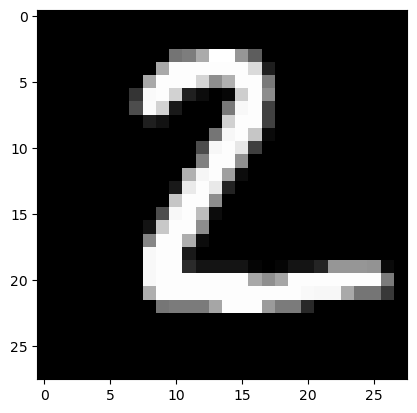

In [39]:
## Display the 2nd image from the original test images  
plt.imshow(images_test[idx_img_predict])

Compare the provided label from MNIST dataset associated with this image of prediction.

In [40]:
print("The provided label for this image is: \n", labels_test[idx_img_predict])

The provided label for this image is: 
 2
